In [1]:
# 로이터 뉴스 데이터셋 불러오기
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
# 불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2113536/2110848 [==============================] - 2s 1us/step


In [4]:
import numpy as np
# 데이터 확인하기
category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
from keras.preprocessing import sequence

# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

In [7]:
from keras.utils import np_utils
# 데이터 전처리
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

In [9]:
# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

W0821 14:18:39.128527  1576 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0821 14:18:39.164727  1576 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 14:18:39.167727  1576 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [10]:
# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0821 14:19:40.622275  1576 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0821 14:19:40.647276  1576 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [17]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 12s 1ms/step - loss: 0.7223 - acc: 0.8181 - val_loss: 1.2192 - val_acc: 0.7048
Epoch 2/20
8982/8982 [==============================] - 12s 1ms/step - loss: 0.6925 - acc: 0.8241 - val_loss: 1.2349 - val_acc: 0.7070
Epoch 3/20
8982/8982 [==============================] - 12s 1ms/step - loss: 0.6543 - acc: 0.8329 - val_loss: 1.2688 - val_acc: 0.7012
Epoch 4/20
8982/8982 [==============================] - 12s 1ms/step - loss: 0.6244 - acc: 0.8428 - val_loss: 1.2853 - val_acc: 0.7061
Epoch 5/20
8982/8982 [==============================] - 12s 1ms/step - loss: 0.5931 - acc: 0.8515 - val_loss: 1.2885 - val_acc: 0.7048
Epoch 6/20
8982/8982 [==============================] - 12s 1ms/step - loss: 0.5689 - acc: 0.8556 - val_loss: 1.3050 - val_acc: 0.7044
Epoch 7/20
8982/8982 [==============================] - 12s 1ms/step - loss: 0.5399 - acc: 0.8629 - val_loss: 1.3399 - val_acc: 0.7039
Epoch 8

In [13]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

2246/2246 [==============================] - 1s 419us/step

 Test Accuracy: 0.7030


In [14]:
# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_acc']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['acc']

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

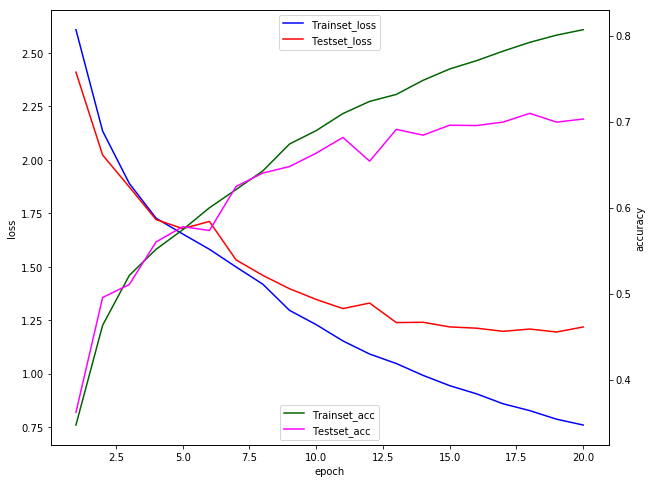

In [16]:
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper center')
ax1.legend(loc='lower center')
plt.show()